In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pylab

In [ ]:
raw_csv_data = pd.read_csv("C:/Users/MUHAMMED SHAH/Desktop/Observability server data/SET 2/SERVER 1/csv_formatted.csv")
data = raw_csv_data.copy()

In [ ]:
data.isna().sum()

Unnamed: 0                 1908
timestamp                  1908
vmMemoryDemand             1908
guest_demand               1908
guest_provisioned          1908
vm_capacity_provisioned    1908
effective_limit            1908
dtype: int64

In [ ]:
data.timestamp = pd.to_datetime(data.timestamp)
data['hour'] = data['timestamp'].apply(lambda x:x.hour)
x_call = data.columns[1:-1]

In [ ]:
data.head()

,Unnamed: 0,timestamp,vmMemoryDemand,guest_demand,guest_provisioned,vm_capacity_provisioned,effective_limit,hour
0,0.0,2022-11-11 19:16:00,13844401.0,3838625.00,33554432.0,16799.99805,33815464.0,19.0
1,1.0,2022-11-11 19:21:00,13832758.0,3617164.25,33554432.0,16799.99805,33815464.0,19.0
2,2.0,2022-11-11 19:26:00,13834057.0,3051213.50,33554432.0,16799.99805,33815464.0,19.0
3,3.0,2022-11-11 19:31:00,13859266.0,3764804.50,33554432.0,16799.99805,33815464.0,19.0
4,4.0,2022-11-11 19:36:00,13867352.0,3174246.25,33554432.0,16799.99805,33815464.0,19.0


In [ ]:
data.tail()

,Unnamed: 0,timestamp,vmMemoryDemand,guest_demand,guest_provisioned,vm_capacity_provisioned,effective_limit,hour
51836,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
51837,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
51838,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
51839,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
51840,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.isna().sum()

Unnamed: 0                 1908
timestamp                  1908
vmMemoryDemand             1908
guest_demand               1908
guest_provisioned          1908
vm_capacity_provisioned    1908
effective_limit            1908
hour                       1908
dtype: int64

In [ ]:
data = data.apply (pd.to_numeric, errors='coerce')
data = data.dropna()

In [ ]:
data

,Unnamed: 0,timestamp,vmMemoryDemand,guest_demand,guest_provisioned,vm_capacity_provisioned,effective_limit,hour
0,0.0,1668194160000000000,13844401.0,3838625.00,33554432.0,16799.99805,33815464.0,19.0
1,1.0,1668194460000000000,13832758.0,3617164.25,33554432.0,16799.99805,33815464.0,19.0
2,2.0,1668194760000000000,13834057.0,3051213.50,33554432.0,16799.99805,33815464.0,19.0
3,3.0,1668195060000000000,13859266.0,3764804.50,33554432.0,16799.99805,33815464.0,19.0
4,4.0,1668195360000000000,13867352.0,3174246.25,33554432.0,16799.99805,33815464.0,19.0
...,...,...,...,...,...,...,...,...
49928,49928.0,1683744660000000000,15023986.0,5684120.00,33554432.0,16799.99609,33815236.0,18.0
49929,49929.0,1683744960000000000,15002012.0,4872101.50,33554432.0,16799.99609,33815236.0,18.0
49930,49930.0,1683745260000000000,14994134.0,4724462.00,33554432.0,16799.99609,33815236.0,19.0
49931,49931.0,1683745560000000000,14986520.0,3764803.75,33554432.0,16799.99609,33815236.0,19.0


In [ ]:
data_fix = pd.DataFrame({'total memory':np.sum(data[x_call]).values})
data_fix['average per day']=data[x_call].mean().values

for hour in range(24):
    data_fix['% hour'+str(hour)] = data[data['hour']==hour][x_call].sum().values/data_fix['total memory']*100

In [ ]:
data_fix.head()

,total memory,average per day,% Monday,% Tuesday,% Wednesday,% Thursday,% Friday,% Saturday,% Sunday,% weekday,% weekend
0,7.310613e+11,1.464084e+07,15.116000,14.498979,13.913406,13.506379,13.208740,14.747454,15.009042,70.243504,29.756496
1,2.638065e+11,5.283209e+06,15.547615,19.385130,13.050710,12.649504,11.961036,12.810748,14.595256,72.593996,27.406004
2,1.675473e+12,3.355443e+07,14.391284,14.393287,14.217051,13.968718,13.860573,14.609577,14.559510,70.830913,29.169087
3,8.388743e+08,1.680000e+04,14.391284,14.393287,14.217051,13.968718,13.860573,14.609577,14.559510,70.830913,29.169087
4,1.688119e+12,3.380769e+07,14.393263,14.392230,14.215404,13.967366,13.858003,14.611415,14.562318,70.826267,29.173733


In [ ]:
data_fix.isna().sum()

total memory       0
average per day    0
% hour0            0
% hour1            0
% hour2            0
% hour3            0
% hour4            0
% hour5            0
% hour6            0
% hour7            0
% hour8            0
% hour9            0
% hour10           0
% hour11           0
% hour12           0
% hour13           0
% hour14           0
% hour15           0
% hour16           0
% hour17           0
% hour18           0
% hour19           0
% hour20           0
% hour21           0
% hour22           0
% hour23           0
dtype: int64

In [ ]:
data_fix

,total memory,average per day,% hour0,% hour1,% hour2,% hour3,% hour4,% hour5,% hour6,% hour7,...,% hour14,% hour15,% hour16,% hour17,% hour18,% hour19,% hour20,% hour21,% hour22,% hour23
0,-1.132808e+18,1.676081e+18,418.382881,91.254428,267.028497,-619.899224,-762.467335,-736.661752,-287.476846,-421.810050,...,-411.671776,-716.663686,-417.608793,468.986428,-412.959353,-698.902841,-696.829263,-398.018479,484.573100,48.047039
1,7.310613e+11,1.464084e+07,3.913290,3.806539,3.957444,3.950905,3.943343,4.044997,4.119439,4.213501,...,4.278486,4.242408,4.249589,4.231820,4.273682,4.259706,4.257448,4.259797,4.249587,4.293983
2,2.638065e+11,5.283209e+06,4.536936,3.987777,5.029420,4.305068,3.960894,4.056645,4.063844,4.048621,...,3.468686,5.853005,5.265281,5.140067,4.648333,3.639468,3.780452,3.542245,4.127228,4.611938
3,1.675473e+12,3.355443e+07,3.873190,3.767048,3.919252,3.953297,3.933271,4.065448,4.125528,4.215649,...,4.281738,4.219654,4.237678,4.225662,4.281738,4.285743,4.285743,4.303767,4.269721,4.275729
4,8.388743e+08,1.680000e+04,3.873190,3.767048,3.919252,3.953297,3.933271,4.065448,4.125528,4.215649,...,4.281738,4.219654,4.237678,4.225662,4.281738,4.285743,4.285743,4.303767,4.269721,4.275729
5,1.688119e+12,3.380769e+07,3.873373,3.767209,3.919241,3.952949,3.933030,4.065088,4.125337,4.215406,...,4.281894,4.219835,4.237709,4.225658,4.281885,4.285891,4.285867,4.303831,4.269782,4.275931


In [ ]:
#STANDARDIZATION OF DATA

from sklearn.preprocessing import StandardScaler
x_calls = data_fix.columns[1:]
scaller = StandardScaler()
matrix = pd.DataFrame(scaller.fit_transform(data_fix[x_calls]),columns=x_calls)
print(matrix.head())

   average per day   % hour0   % hour1   % hour2   % hour3   % hour4  \
0         2.236068  2.236065  2.236062  2.236049 -2.236068 -2.236068   
1        -0.447214 -0.447865 -0.447599 -0.449164  0.446903  0.447223   
2        -0.447214 -0.443827 -0.442037 -0.438222  0.448426  0.447284   
3        -0.447214 -0.448125 -0.448810 -0.449554  0.446913  0.447187   
4        -0.447214 -0.448125 -0.448810 -0.449554  0.446913  0.447187   

    % hour5   % hour6   % hour7   % hour8  ...  % hour14  % hour15  % hour16  \
0 -2.236068 -2.236068 -2.236068  2.236067  ... -2.236064 -2.236063 -2.236062   
1  0.447161  0.447283  0.447413 -0.447469  ...  0.448245  0.446065  0.445966   
2  0.447203  0.446771  0.446375 -0.445528  ...  0.443019  0.452057  0.452424   
3  0.447235  0.447339  0.447427 -0.447690  ...  0.448266  0.445980  0.445891   
4  0.447235  0.447339  0.447427 -0.447690  ...  0.448266  0.445980  0.445891   

   % hour17  % hour18  % hour19  % hour20  % hour21  % hour22  % hour23  
0  2.236064 

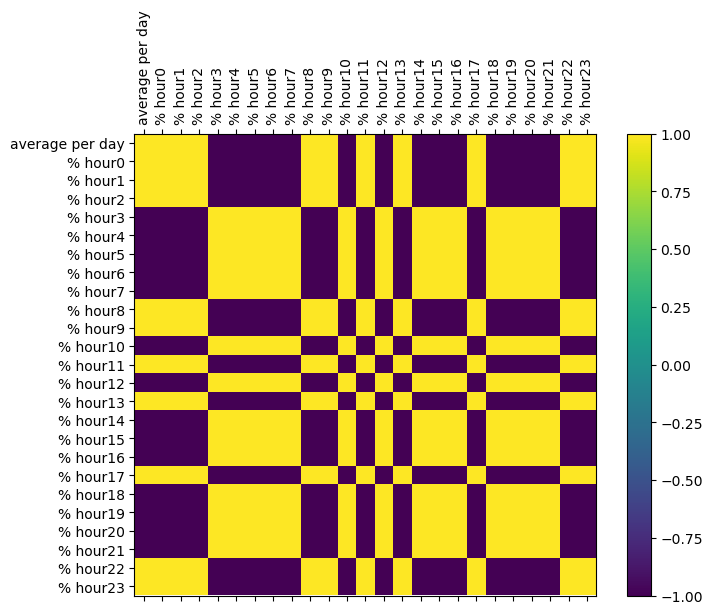

In [ ]:
#CORRELATION

corr = matrix[x_calls].corr()
fig, ax = plt.subplots(figsize=(8, 6))
cax=ax.matshow(corr,vmin=-1,vmax=1)
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.xticks(rotation=90)
plt.colorbar(cax)

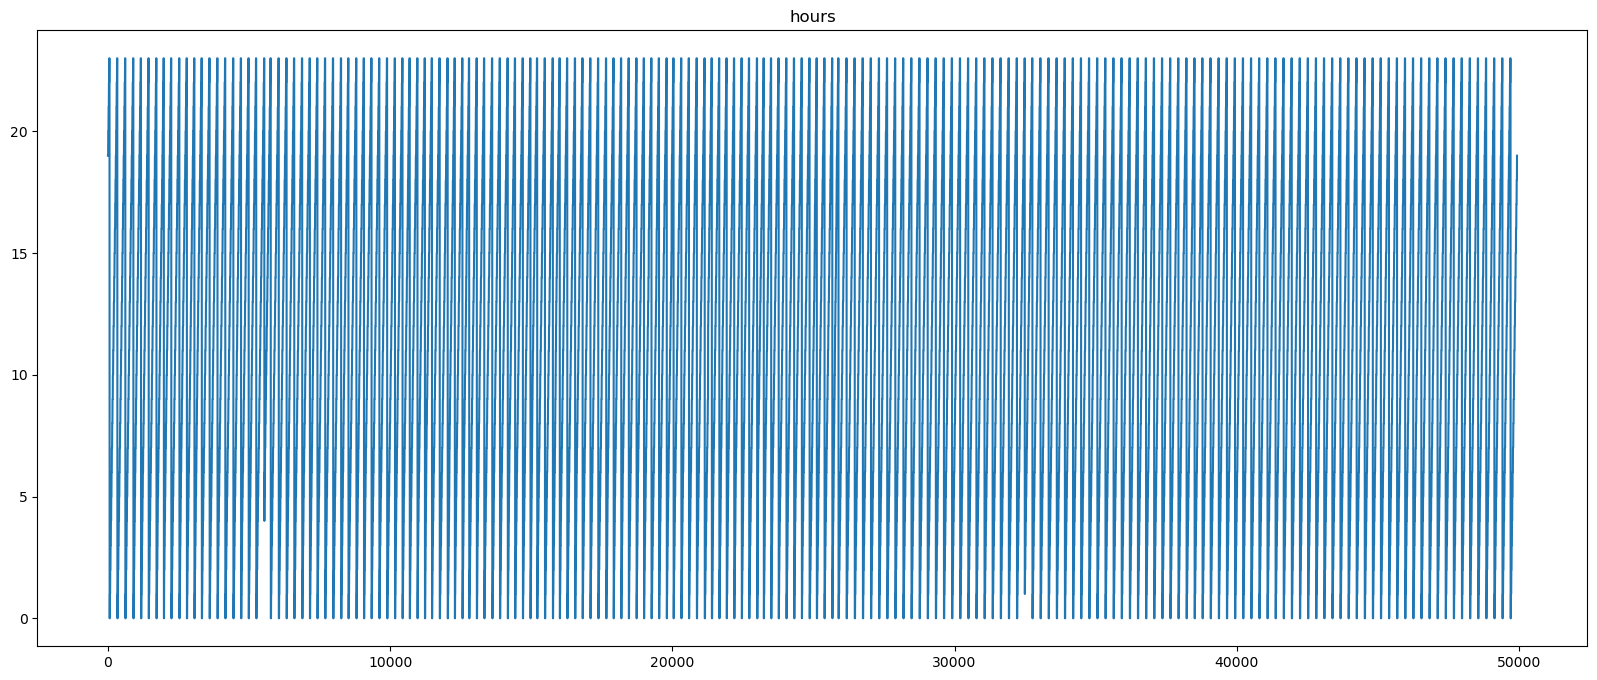

In [ ]:
plt.figure(figsize=(20,8))
plt.title("hours")
data.hour.plot()
plt.show()